# 1. Business Understanding

## Introduction

A non-store online retail business represents an e-commerce venture that conducts all its business in the digital realm and doesn't have a physical location. This service is offered by companies through websites and applications where customers place orders via the Internet, and products are shipped directly to their addresses. These businesses have grown significantly in popularity, particularly since the COVID-19 pandemic. Lockdowns and social distancing measures forced consumers to look for safer and more practical ways to shop, and non-store online retailers were crucial during this time as they were able to provide a wide array of products and services accessible from the safety of one's home. An advantage to online non-store retail business there is a wide selection of goods, buyer and shopping secrecy exists, customers can avoid long lines, unique and rare goods can be found, and there is comprehensive information about the goods that you are purchasing as well as online discounts.
In order to effect the benefits of online shopping, one can employ a recommendation system that serves as an information filtering tool, working to anticipate a user's preferences and offer recommendations tailored to those preferences.

## Problem Statement

Non-store online retail business faces several challenges and issues that require attention in order to succeed in the digital marketplace. various challenges such as customer engagement, product discovery, personalization, and inventory management. These processes can be tedious as they have to collect information on customer preferences, cost of items, quality of products, and durability among other factors. In most cases, these retailers are not able to get this information and therefore this can have a negative impact on their businesses. A UK-based online retail company that specializes in selling unique all-occasion gifts, catering to both individual customers and wholesalers who are the stakeholders understand the importance of a recommendation system that will help them address these challenges and enhance the customer experience. 

From the several factors our primary objective that we aim to achieve are:
 * enhancing customer engagement by offering personalized product recommendations based on user preferences and purchase history.
* Mitigate the product discovery challenge by highlighting relevant items, making the shopping experience more enjoyable and efficient.

# 2. Data Understanding

### Describing the data

#### Column Names and Description

* `InvoiceNo` - Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* `StockCode` - Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* `Description`  Product (item) name. Nominal.
* `Quantity` - The quantities of each product (item) per transaction. Numeric.
* `InvoiceDate` - Invoice Date and time. Numeric, the day and time when each transaction was generated.
* `UnitPrice` - Unit price. Numeric, Product price per unit in sterling.
* `CustomerID` - Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* `Country` -Country name. Nominal, the name of the country where each customer resides.

### Importing Libraries

In [1]:
# Basic data manipultion and analysis
import pandas as pd
import numpy as np
# Data visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
# Machine learning models
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection.validation import cross_validate
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [2]:
# importing the data
df = pd.read_csv("C:/Users/Rfwel/Desktop/Moringa Course Materials/Phase 4/Phase 4 project/dsc-Recommender-system/data.csv", index_col=0)
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# summary statistics of the data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The standard deviation and the mean for column Quantity and UnitPrice are shown 

In [4]:
#number rows and columns in the data
df.shape

(541909, 7)

* There are 7 columns and 541,909 rows in this data


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#checking for null values in the dataframe
df.isna().sum()

StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* CustomerID and Description clolumns have missing values

In [7]:
# checking for duplicates
df.duplicated().sum()

5848

# 3. Data Preparation

In [8]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Changing  Date type

In [9]:
# changing date data type years, months, day and time
df['Month'] = df['InvoiceDate'].apply(lambda x : x.split('/')[0]).astype(np.uint8)
df['Day'] = df['InvoiceDate'].apply(lambda x : x.split('/')[1]).astype(np.uint8)
df['Year'] = df['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[0]).astype(np.uint16)
df['Time'] = df['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[1])
df['Hour']= df['Time'].apply(lambda x : x.split(':')[0]).astype(np.uint8)
df['Min']= df['Time'].apply(lambda x : x.split(':')[1]).astype(np.uint8)
df['datetime'] = list(map(lambda x : datetime.date(x[0],x[1],x[2]),df[['Year','Month','Day']].values) )
df['Day_week'] = list(map(lambda x :x.weekday(),df['datetime'].values)) # datetime.date(2017,12,25)
df['Day_week'] = df['Day_week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})
df = df.sort_values('datetime')

df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week
InvoiceNo,,,,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010,8:26,8,26,2010-12-01,Wed
536557,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/1/2010 14:41,3.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed
536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed
536557,22686,FRENCH BLUE METAL DOOR SIGN No,1,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed
536557,22468,BABUSHKA LIGHTS STRING OF 10,1,12/1/2010 14:41,6.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed


In [16]:
# Calculating the total cost per order
df['Total_Amount'] = df['Quantity']*df['UnitPrice']
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week,Total_Amount
InvoiceNo,,,,,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010,8:26,8,26,2010-12-01,Wed,15.30
536557,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/1/2010 14:41,3.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
536557,22686,FRENCH BLUE METAL DOOR SIGN No,1,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,1.25
536557,22468,BABUSHKA LIGHTS STRING OF 10,1,12/1/2010 14:41,6.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,6.75


In [17]:
# New data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536061 entries, 536365 to 581587
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   StockCode     536061 non-null  object 
 1   Description   534608 non-null  object 
 2   Quantity      536061 non-null  int64  
 3   InvoiceDate   536061 non-null  object 
 4   UnitPrice     536061 non-null  float64
 5   CustomerID    401564 non-null  float64
 6   Country       536061 non-null  object 
 7   Month         536061 non-null  uint8  
 8   Day           536061 non-null  uint8  
 9   Year          536061 non-null  uint16 
 10  Time          536061 non-null  object 
 11  Hour          536061 non-null  uint8  
 12  Min           536061 non-null  uint8  
 13  datetime      536061 non-null  object 
 14  Day_week      536061 non-null  object 
 15  Total_Amount  536061 non-null  float64
dtypes: float64(3), int64(1), object(7), uint16(1), uint8(4)
memory usage: 52.1+ MB


In [18]:
# New data set first 5 rows
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week,Total_Amount
InvoiceNo,,,,,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010,8:26,8,26,2010-12-01,Wed,15.30
536557,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/1/2010 14:41,3.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
536557,22686,FRENCH BLUE METAL DOOR SIGN No,1,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,1.25
536557,22468,BABUSHKA LIGHTS STRING OF 10,1,12/1/2010 14:41,6.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,6.75


### Handling Duplicate values

In [19]:
#cheking for duplicates in the data set

df.duplicated().sum()

0

In [20]:
#Dropping the duplicates from the data set
df = df.drop_duplicates()
df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week,Total_Amount
InvoiceNo,,,,,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010,8:26,8,26,2010-12-01,Wed,15.30
536557,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/1/2010 14:41,3.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
536557,22686,FRENCH BLUE METAL DOOR SIGN No,1,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,1.25
536557,22468,BABUSHKA LIGHTS STRING OF 10,1,12/1/2010 14:41,6.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581492,22358,KINGS CHOICE TEA CADDY,1,12/9/2011 10:03,5.79,NaN,United Kingdom,12,9,2011,10:03,10,3,2011-12-09,Fri,5.79
581492,22357,KINGS CHOICE BISCUIT TIN,2,12/9/2011 10:03,4.13,NaN,United Kingdom,12,9,2011,10:03,10,3,2011-12-09,Fri,8.26
581492,22356,CHARLOTTE BAG PINK POLKADOT,1,12/9/2011 10:03,1.63,NaN,United Kingdom,12,9,2011,10:03,10,3,2011-12-09,Fri,1.63


In [21]:
# Checking for duplicates after droping the duplicates
df.duplicated().sum()/len(df)*100

0.0

### Handling Missing values

Missing data in a data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.



In [22]:
# Sum of missing values as a percentage
df.isnull().sum()/len(df)* 100

StockCode        0.000000
Description      0.271051
Quantity         0.000000
InvoiceDate      0.000000
UnitPrice        0.000000
CustomerID      25.089869
Country          0.000000
Month            0.000000
Day              0.000000
Year             0.000000
Time             0.000000
Hour             0.000000
Min              0.000000
datetime         0.000000
Day_week         0.000000
Total_Amount     0.000000
dtype: float64

In [23]:
# Dropping all the null values in the data set
df=df.dropna()
df.isnull().sum()/len(df)* 100

StockCode       0.0
Description     0.0
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID      0.0
Country         0.0
Month           0.0
Day             0.0
Year            0.0
Time            0.0
Hour            0.0
Min             0.0
datetime        0.0
Day_week        0.0
Total_Amount    0.0
dtype: float64

In [24]:
#checking the distribution of the data in 2010 and 2011
df['Year'].value_counts()/len(df)

2011    0.934374
2010    0.065626
Name: Year, dtype: float64

A bigger percentage of the data set is from 2011



In [25]:
# Checking the months with the highest missing values in 2011
df_2011 = df.loc[lambda df: df["Year"]==2011]
df_2011['Month'].value_counts()[:20];

In [26]:
df['Year'].value_counts()

2011    375211
2010     26353
Name: Year, dtype: int64

In [27]:

#checking the months with the highest missing value in 2010
df_2010 = df.loc[lambda df: df["Year"]==2010]
df_2010['Month'].value_counts()[:20]

12    26353
Name: Month, dtype: int64

### Outliers

In [28]:
# checking for outliers using box plot
def plot_boxplot(x, data):

    # Create the box plot
    sns.boxplot(x=x, data=df)

    # Add labels and title
    plt.xlabel(f"{x}")
    plt.ylabel('Values')
    plt.title(f"Box Plot for {x}")
    # Display the plot
    plt.show()


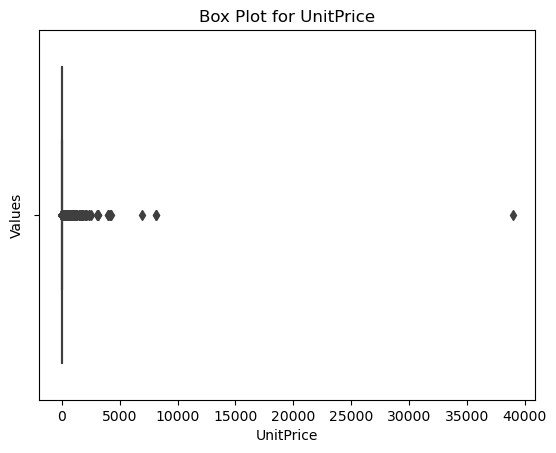

In [29]:
# Distribution plot for unitprice
plot_boxplot('UnitPrice', df)

In [30]:
# Remove Unitprice outliers

# Reset the index
df.reset_index(drop=True, inplace=True)

# Remove price outliers
df['UnitPrice'] = df['UnitPrice'][(np.abs(stats.zscore(df['UnitPrice'])) < 3)]
df['UnitPrice']

0         2.55
1         3.75
2         1.25
3         1.25
4         6.75
          ... 
401559    0.79
401560    0.79
401561    1.95
401562    1.95
401563    4.95
Name: UnitPrice, Length: 401564, dtype: float64

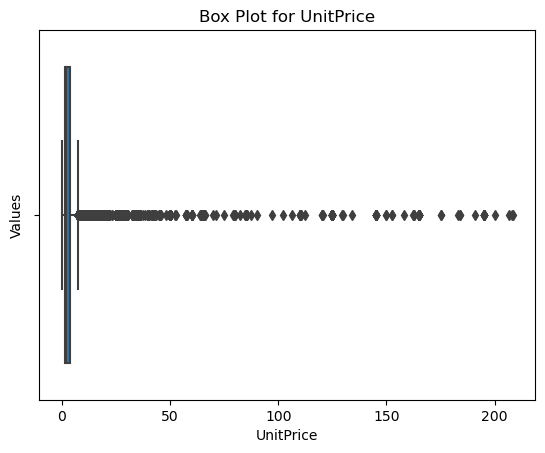

In [31]:
#Distribution plot for UnitPrice after removing the outliers
plot_boxplot('UnitPrice', df)

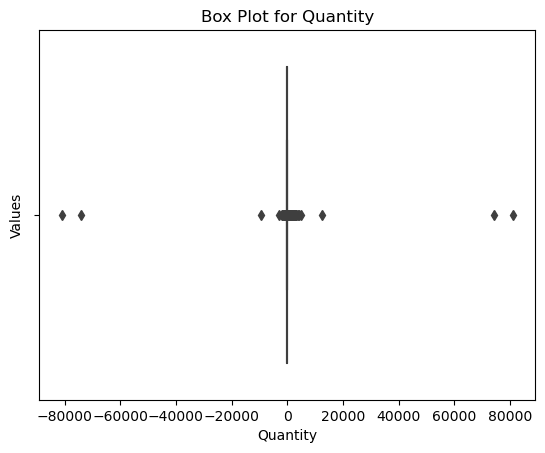

In [32]:
# Distribution plot for Quantity 
plot_boxplot('Quantity', df)

In [33]:
# Remove Quantity outliers

# Reset the index
df.reset_index(drop=True, inplace=True)

# Remove price outliers
df['Quantity'] = df['Quantity'][(np.abs(stats.zscore(df['Quantity'])) < 3)]
df['Quantity']

0          6.0
1          1.0
2          3.0
3          1.0
4          1.0
          ... 
401559    12.0
401560    12.0
401561     8.0
401562     6.0
401563     3.0
Name: Quantity, Length: 401564, dtype: float64

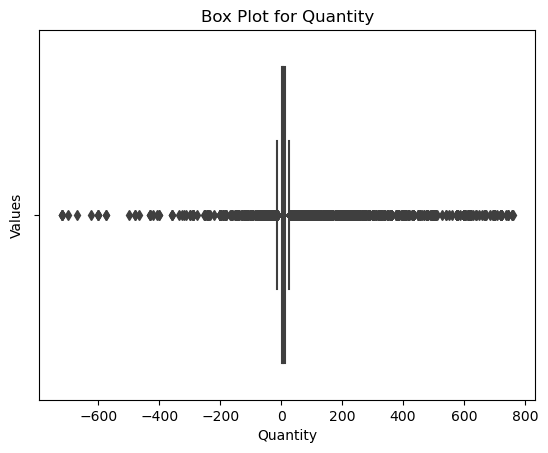

In [34]:
# Distribution plot for Quantity after removing the outliers
plot_boxplot('Quantity', df)

# Exploratory Data Analysis

In the exploratory data analysis phase, we delve into the dataset to uncover meaningful patterns and insights. We start by conducting univariate analysis, examining individual variables' distributions.



## Univariate Analysis

In the Univariate analysis phase of EDA, we focus on examining individual variables in isolation. This entails exploring the distribution, central tendency, spread, and possible outliers of each variable. By visualizing and summarizing one variable at a time, we can identify key features and patterns that contribute to the overall context of the data.

In [35]:
def get_count1(df,column):
  

        plt.figure(figsize=(16,8))
        sns.countplot(x=column,data=df, order=df[column].value_counts().iloc[:10].index)
        plt.title(f'No of orders per top 10 {column}')
        plt.xlabel(column)
        plt.xticks(rotation=90)
        plt.show();

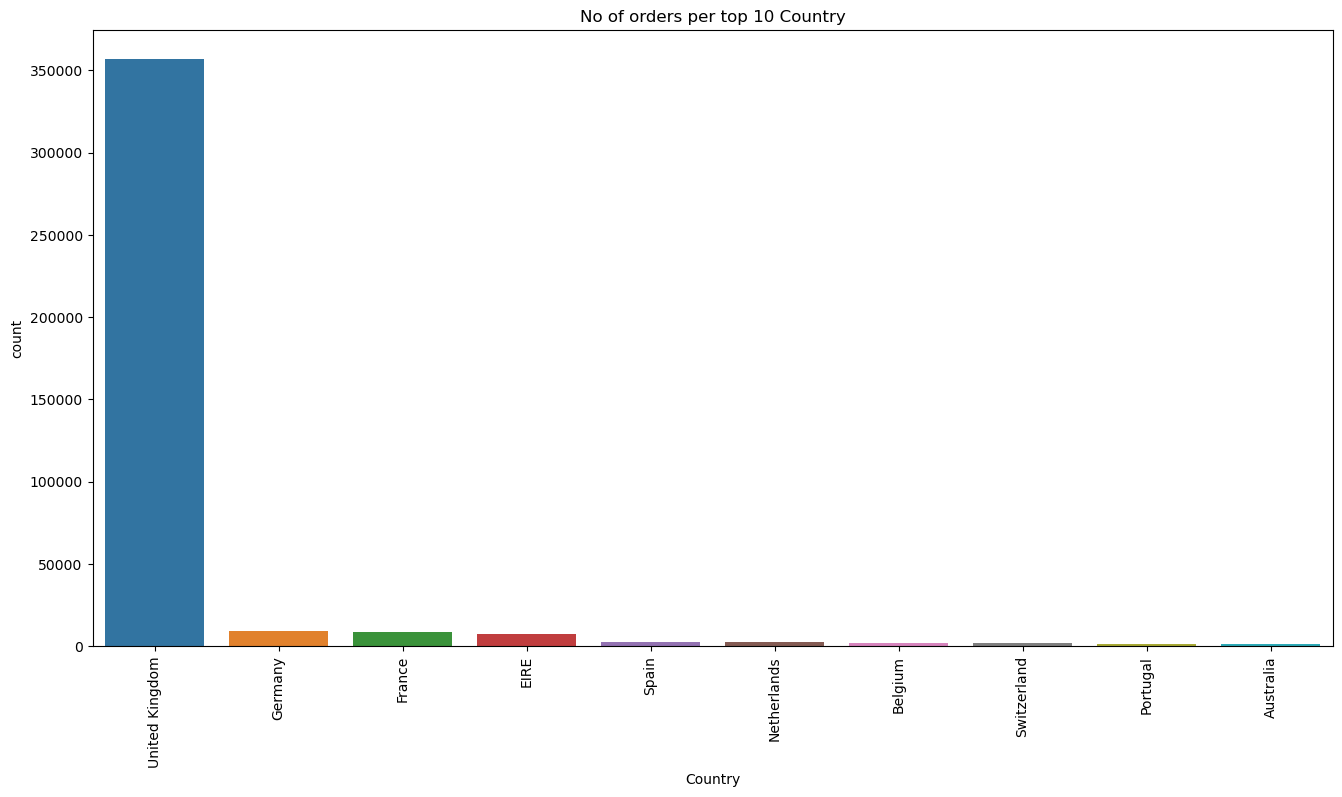

In [36]:
get_count1(df, 'Country')

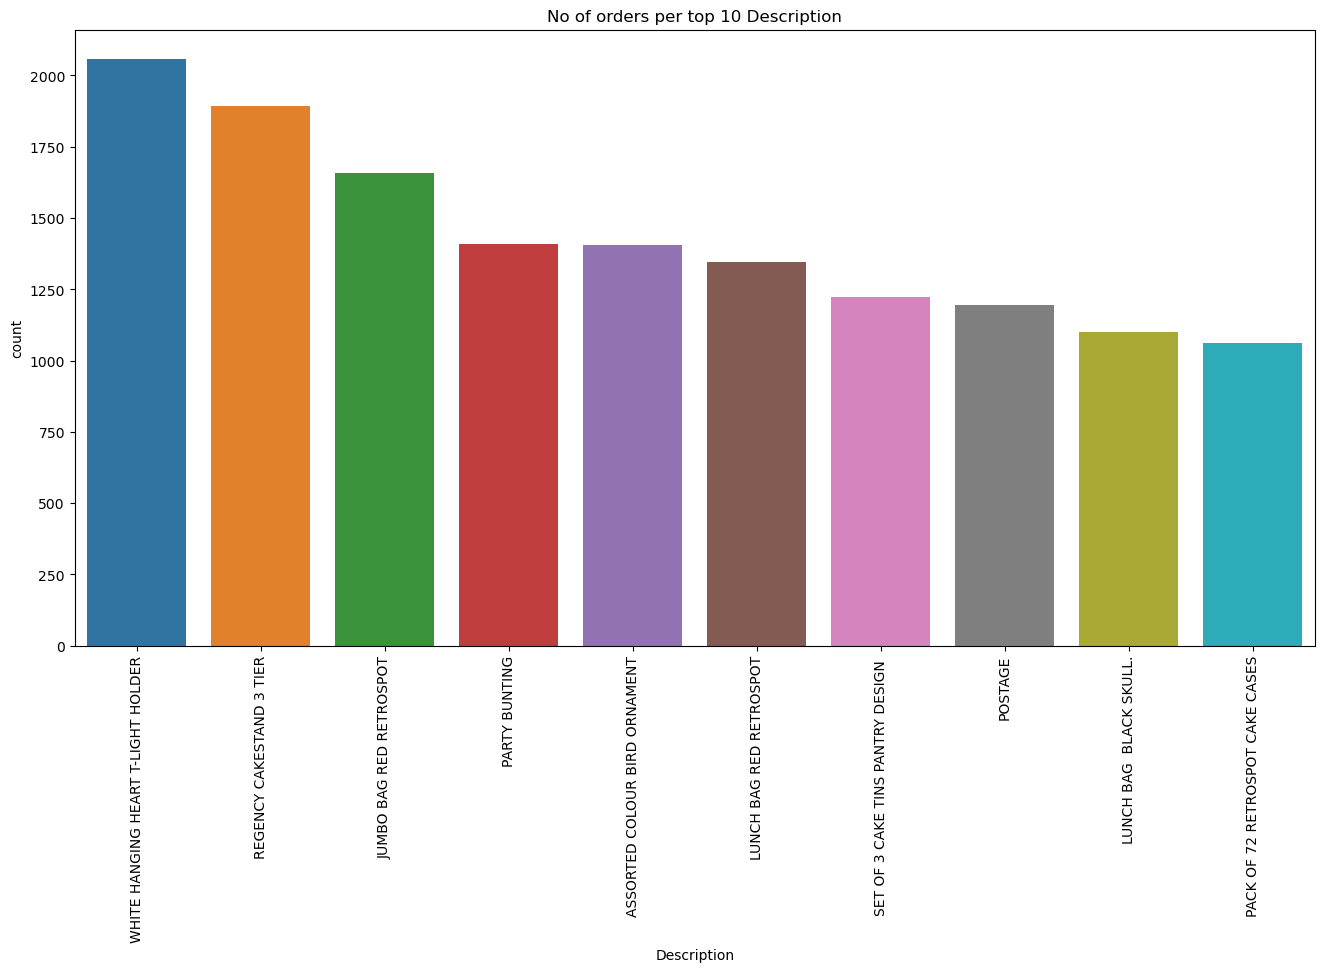

In [37]:
get_count1(df, 'Description')

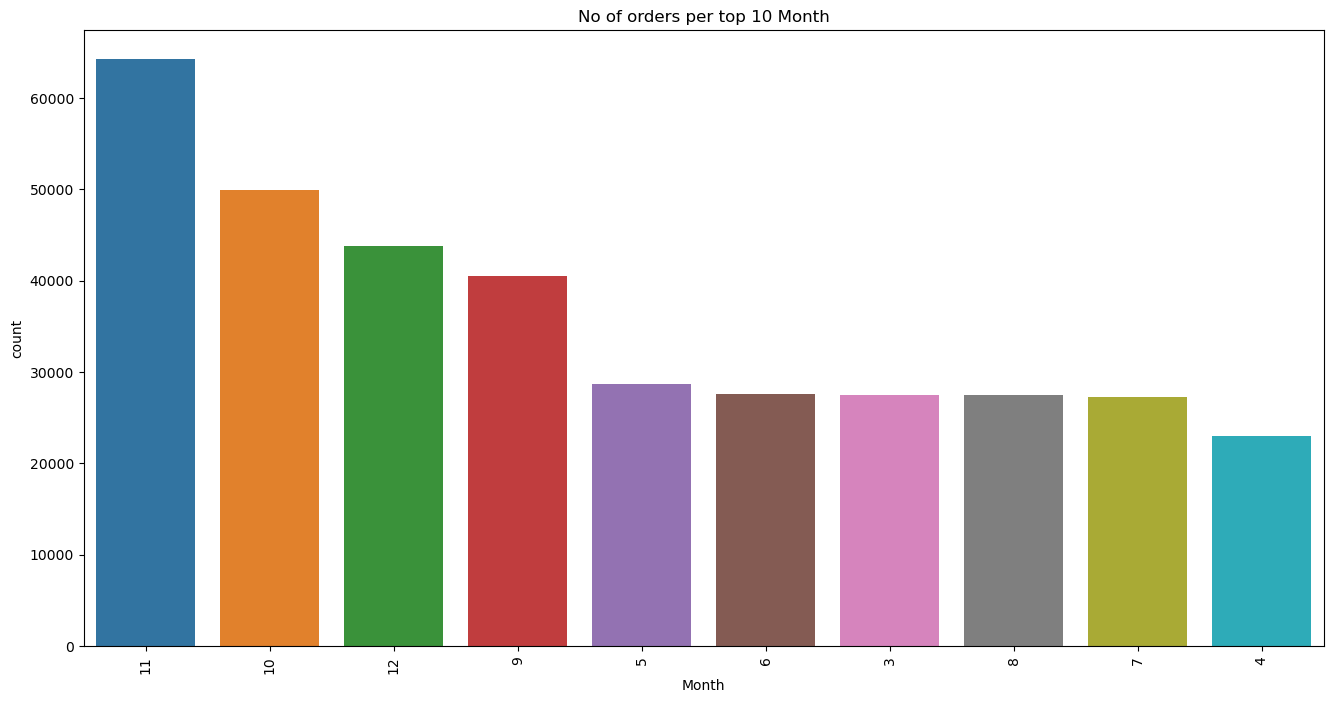

In [38]:
get_count1(df, 'Month')


### Time of Day

In [39]:
def get_time(Hour):
    if Hour < 12:
         return 'Morning'
    if Hour > 12 and Hour < 16:
        return 'Afternoon'
    else:
        return 'Evening'

In [40]:
df['time_day']=df['Hour'].apply(get_time)
df['time_day'].value_counts()

Afternoon    163858
Morning      119899
Evening      117807
Name: time_day, dtype: int64

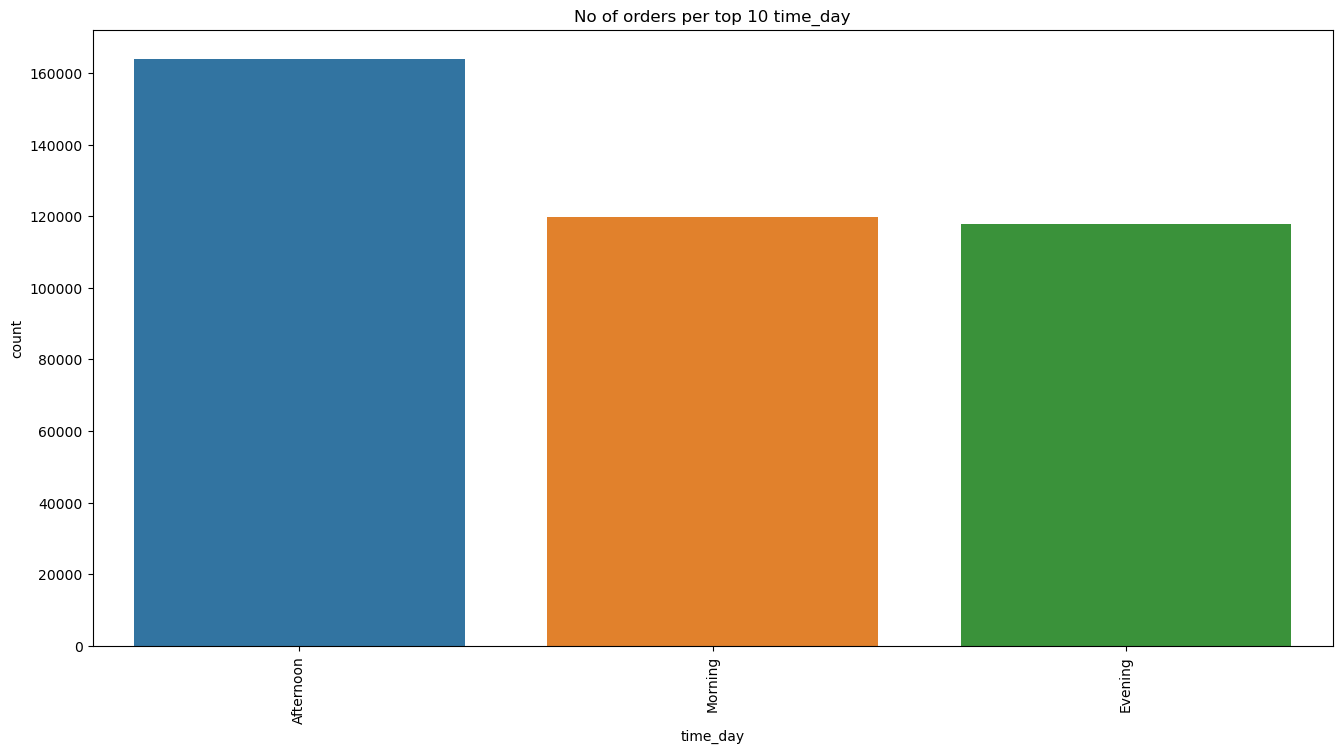

In [41]:
get_count1(df,'time_day')


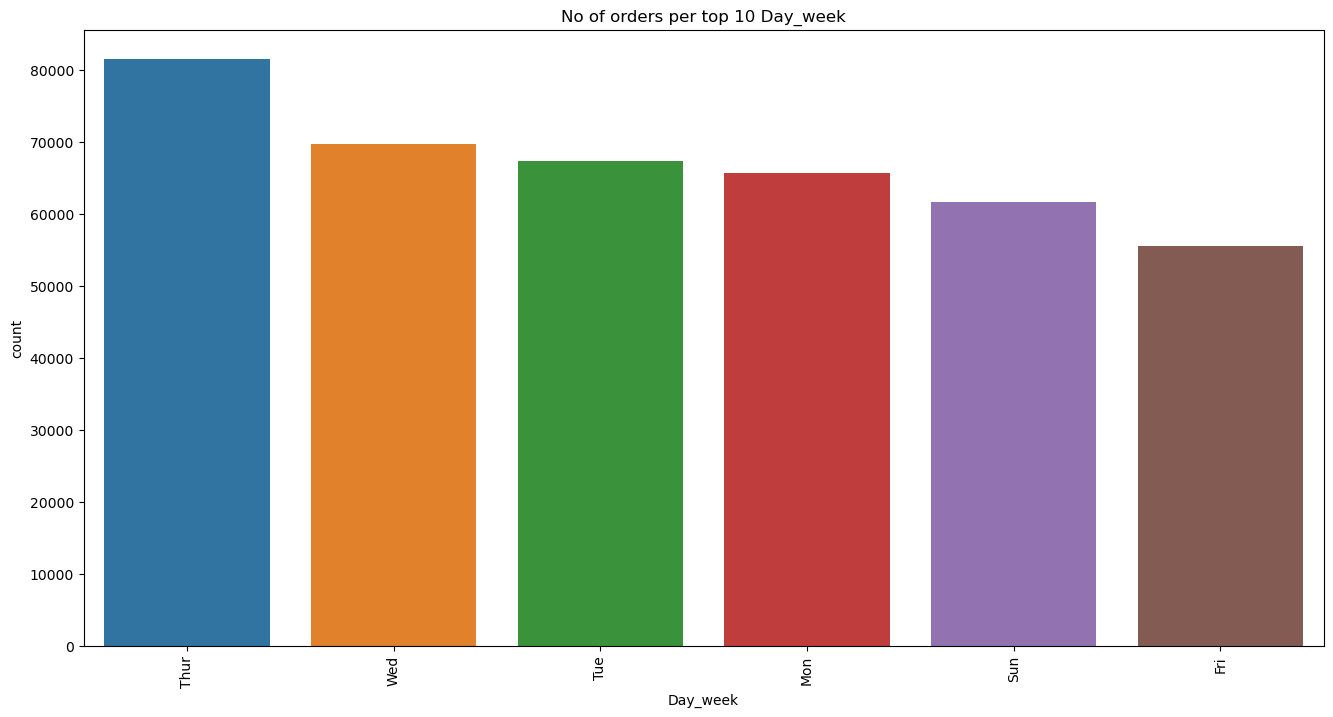

In [42]:
get_count1(df,'Day_week')

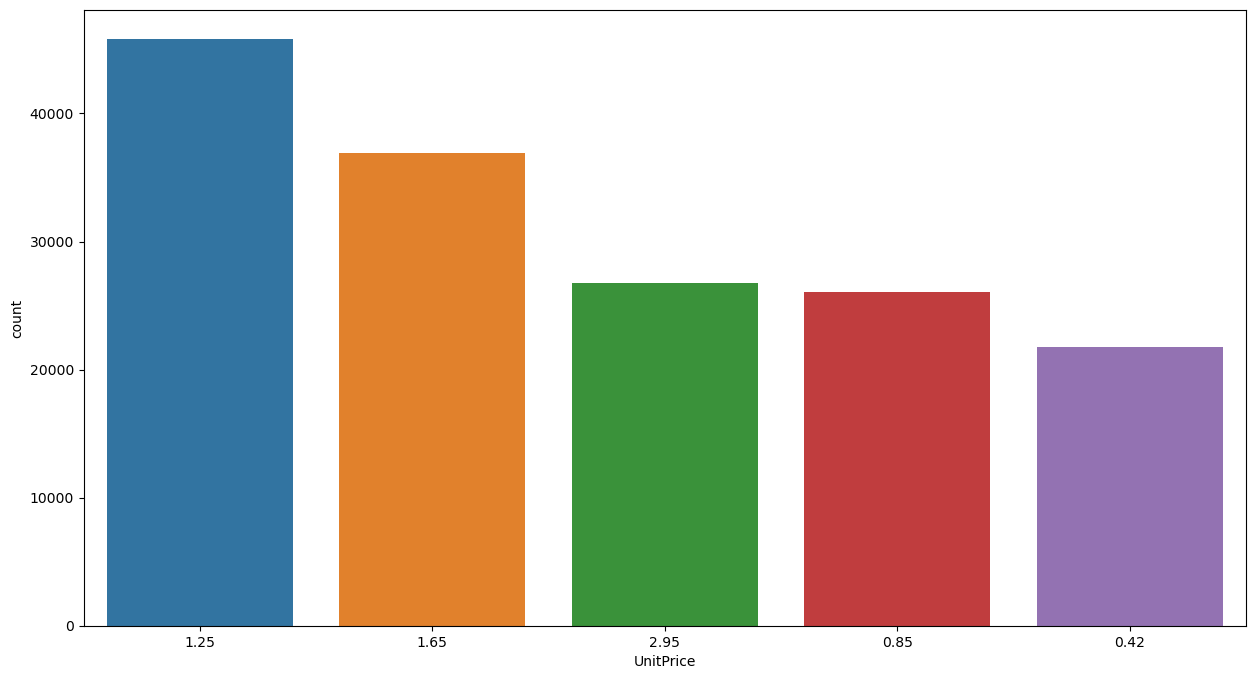

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(x='UnitPrice',data=df,order=df['UnitPrice'].value_counts().iloc[:5].index);

The Univariate analysis has provided us with valuable insights into the individual variables' characteristics and distributions. By visualizing histograms, density plots, and summary statistics, we have identified important patterns and tendencies. 

## Bivariate Analysis

Building on the insights gained from Univariate analysis, Bivariate analysis delves deeper by exploring relationships between pairs of variables. By examining how variables interact with one another, we can uncover correlations, associations, or potential causal relationships.

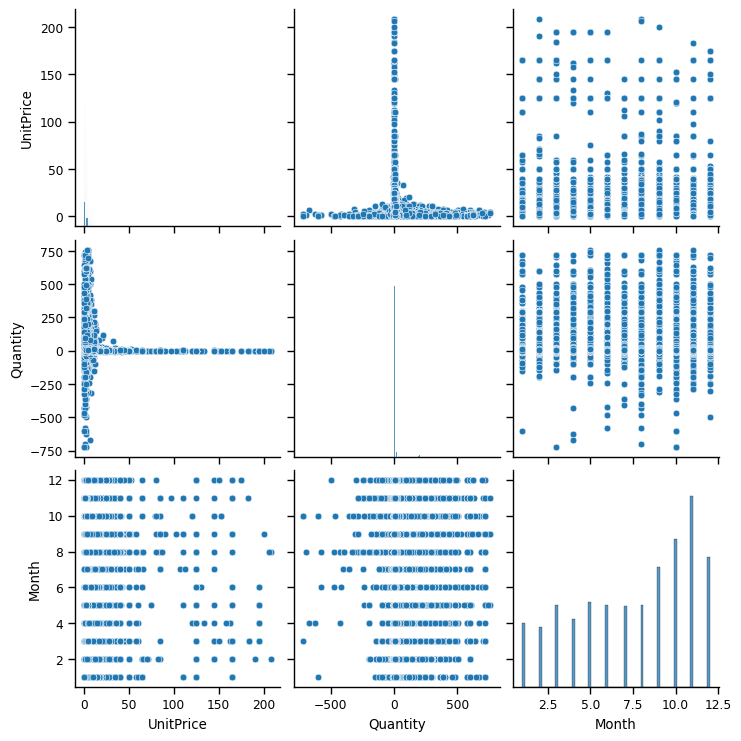

In [44]:
# Pairwise Relationship Visualization of Continuous Data Features with Seaborn
sns.set_context("paper", font_scale= 1)

continuous_data = df.loc[:,["UnitPrice", "Quantity", "Description", "Month"]]
                              
n = sns.pairplot(continuous_data)

In [45]:
def get_biv(column1, df, column2):
    # Creating a DataFrame with the top 10 values of column1
    top_values = df[column1].value_counts().iloc[:10].index
    df_filtered = df[df[column1].isin(top_values)]

    # Creating a catplot to analyze the relationship
    plt.figure(figsize=(10, 6))
    sns.catplot(x=column1, hue=column2, kind="count", data=df_filtered, height=6, aspect=2, order=top_values)
    plt.title(f'{column1} on {column2}')
    plt.ylabel(f'Count of {column1}')
    plt.xlabel(f'{column1}')
    plt.xticks(rotation=45)
    plt.show()



<Figure size 1000x600 with 0 Axes>

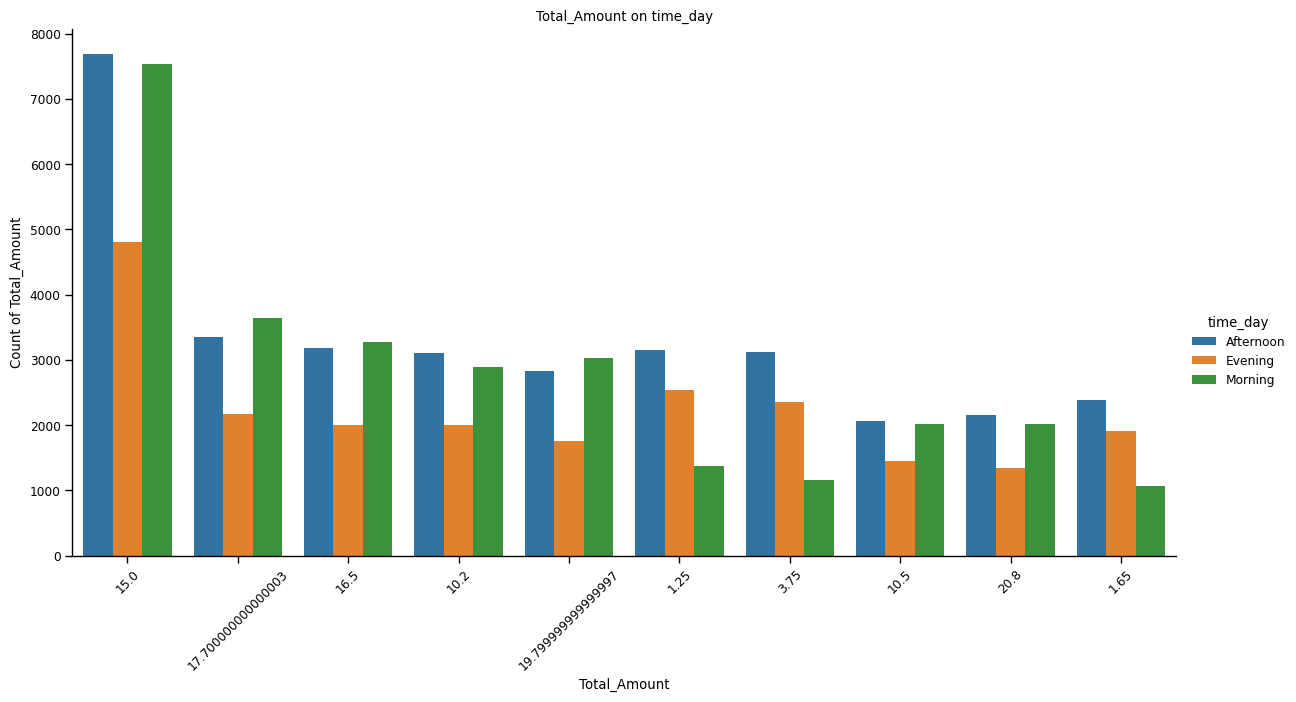

In [46]:
get_biv('Total_Amount',df,'time_day')

<Figure size 1000x600 with 0 Axes>

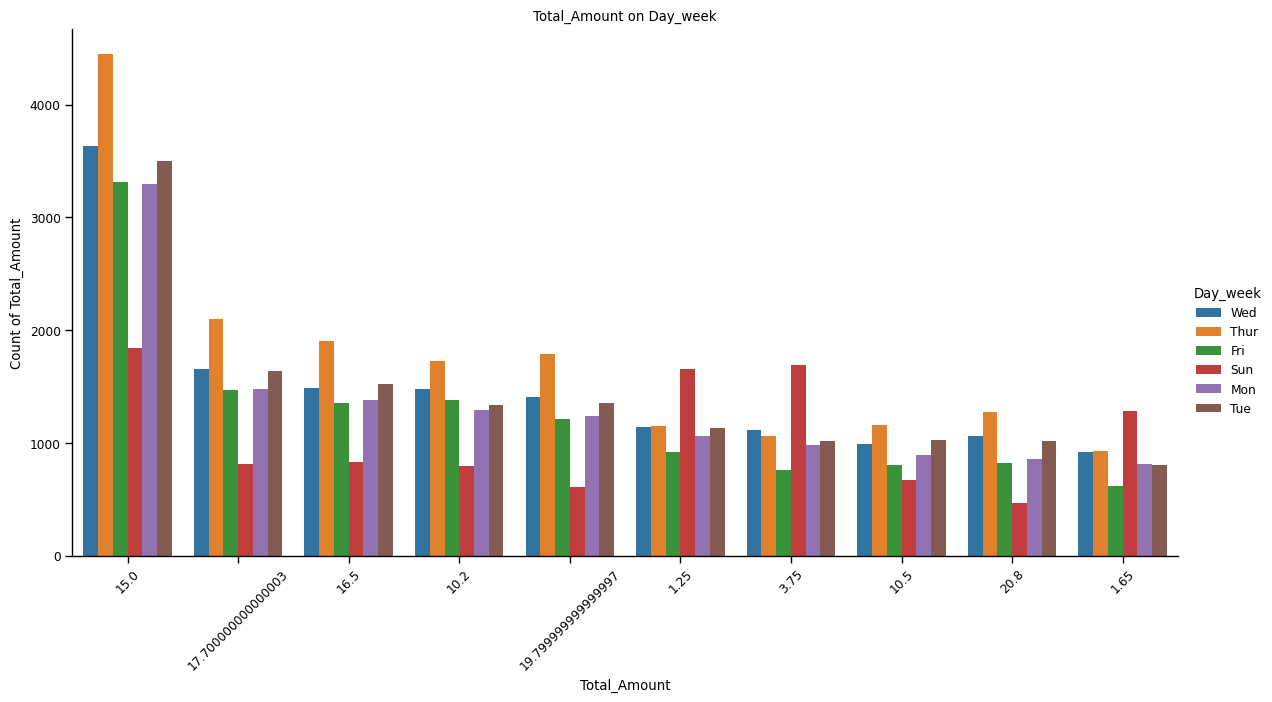

In [47]:
get_biv('Total_Amount',df,'Day_week')


In [48]:
#Creating a new Data Frame that has a summary of the Total Quantity purchased by a customer
new_df = df.groupby(by=['Description'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

new_df

,Description,Quantity
1771,JUMBO BAG RED RETROSPOT,41763.0
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,34111.0
3716,WHITE HANGING HEART T-LIGHT HOLDER,30196.0
217,ASSORTED COLOUR BIRD ORNAMENT,30167.0
2279,PACK OF 72 RETROSPOT CAKE CASES,27626.0
...,...,...
2537,PINK POODLE HANGING DECORATION,-12.0
882,CRUK Commission,-16.0
245,ASSORTED TUTTI FRUTTI ROUND BOX,-24.0
2140,Manual,-138.0


In [49]:
# Defining a function that categorizes the quantity demanded by a customer
def get_time(Quantity):
    if Quantity < 0:
         return 1
    elif Quantity < 500:
        return 2
    elif Quantity < 2000:
        return 3
    elif Quantity < 3000:
        return 4
    else:
        return 5


In [50]:
new_df['rating']=new_df['Quantity'].apply(get_time)

new_df['rating'].value_counts()

2    2210
3    1025
5     398
4     236
1      27
Name: rating, dtype: int64

In [51]:
new_df


,Description,Quantity,rating
1771,JUMBO BAG RED RETROSPOT,41763.0,5
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,34111.0,5
3716,WHITE HANGING HEART T-LIGHT HOLDER,30196.0,5
217,ASSORTED COLOUR BIRD ORNAMENT,30167.0,5
2279,PACK OF 72 RETROSPOT CAKE CASES,27626.0,5
...,...,...,...
2537,PINK POODLE HANGING DECORATION,-12.0,1
882,CRUK Commission,-16.0,1
245,ASSORTED TUTTI FRUTTI ROUND BOX,-24.0,1
2140,Manual,-138.0,1


In [52]:
new_df = new_df.drop(columns='Quantity')
new_df

,Description,rating
1771,JUMBO BAG RED RETROSPOT,5
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5
3716,WHITE HANGING HEART T-LIGHT HOLDER,5
217,ASSORTED COLOUR BIRD ORNAMENT,5
2279,PACK OF 72 RETROSPOT CAKE CASES,5
...,...,...
2537,PINK POODLE HANGING DECORATION,1
882,CRUK Commission,1
245,ASSORTED TUTTI FRUTTI ROUND BOX,1
2140,Manual,1


In [53]:
new_df = pd.merge(new_df, df, on = 'Description')

new_df.head()

,Description,rating,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week,Total_Amount,time_day
0,JUMBO BAG RED RETROSPOT,5,85099B,30.0,12/1/2010 16:11,1.65,13777.0,United Kingdom,12,1,2010,16:11,16,11,2010-12-01,Wed,49.5,Evening
1,JUMBO BAG RED RETROSPOT,5,85099B,70.0,12/1/2010 16:01,1.65,13777.0,United Kingdom,12,1,2010,16:01,16,1,2010-12-01,Wed,115.5,Evening
2,JUMBO BAG RED RETROSPOT,5,85099B,200.0,12/1/2010 16:19,1.65,13777.0,United Kingdom,12,1,2010,16:19,16,19,2010-12-01,Wed,330.0,Evening
3,JUMBO BAG RED RETROSPOT,5,85099B,2.0,12/1/2010 11:45,1.95,17908.0,United Kingdom,12,1,2010,11:45,11,45,2010-12-01,Wed,3.9,Morning
4,JUMBO BAG RED RETROSPOT,5,85099B,100.0,12/1/2010 9:57,1.65,16029.0,United Kingdom,12,1,2010,9:57,9,57,2010-12-01,Wed,165.0,Morning


# 4. Modeling

The Modeling phase involves creating predictive models based on the insights gained from the Exploratory Data Analysis (EDA). In this phase, we utilize machine learning algorithms to build models that can make a recommendation system based on the available data.



### Memory Based (User-User) - Cosine Similarity

In [54]:
#creating customer matrix of items for the client
customer_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='Description', 
    values='Quantity',
    aggfunc='sum'
)

customer_item_matrix

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# changing the customer_item_matrix to '0''and '1'
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

customer_item_matrix

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine Similarity between the Customers

In [56]:
#use the customer_item_matrix to calculate the cosine between the customers
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)

In [57]:
#change the user_user_matrix index to match the cutomer Index
user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.012938,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.101565,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.168053,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.122946,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.113547,0.015237
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044118,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.045835,0.000000
4369,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017504,0.000000
4370,0.0,0.101565,0.168053,0.113547,0.044118,0.071655,0.0,0.111463,0.033634,0.091616,...,0.0,0.0,0.016817,0.042875,0.000000,0.000000,0.045835,0.017504,1.000000,0.094726


In [58]:
#changing the data index to CustomerID
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix 

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.012938,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.101565,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.168053,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.122946,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.113547,0.015237
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044118,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.045835,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017504,0.000000


### Testing The Cosine Similarity

In [59]:
Top_customer_orders = df.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
Top_customer_orders .head(10)

,CustomerID,Country,Quantity
1711,14646.0,Netherlands,187551.0
1903,14911.0,EIRE,77155.0
57,12415.0,Australia,75130.0
3809,17511.0,United Kingdom,63012.0
4241,18102.0,United Kingdom,59962.0
1013,13694.0,United Kingdom,57947.0
1455,14298.0,United Kingdom,57121.0
1353,14156.0,EIRE,54508.0
3766,17450.0,United Kingdom,53029.0
3210,16684.0,United Kingdom,48590.0


In [60]:
#top 5 customers (Top CustomerID - 14646)

user_user_sim_matrix.loc[14646].sort_values(ascending=False)

CustomerID
14646.0    1.000000
14911.0    0.467512
12415.0    0.451567
12748.0    0.445622
17841.0    0.425535
             ...   
13017.0    0.000000
17307.0    0.000000
17948.0    0.000000
16073.0    0.000000
12346.0    0.000000
Name: 14646.0, Length: 4372, dtype: float64

* We are able to see the top 3 customers are customer ID 14646, 14911 and 12415 


* We identify the items already purchased with customer ID 14646 and 14911.

* In order to get the product which customer ID 14911 has not yet purchased but the top client who is customer ID 14646 has,
we less items that 

hese two customers have bought similar items in the past, we will assume that target customer 12415 has a high probability of buying the items he or she has not bought, but customer 14646 has.

Finally, we are going to use this list of items and recommend them to target customer 12415.

Let's first see how we can retrieve the items that the 14646 customer has purchased in the past.

In [61]:
#Items bought by customer 14646

items_bought_by_A = set(customer_item_matrix.loc[14646].iloc[
    customer_item_matrix.loc[14646].to_numpy().nonzero()
].index)

items_bought_by_A

{' DOLLY GIRL BEAKER',
 ' I LOVE LONDON MINI BACKPACK',
 ' I LOVE LONDON MINI RUCKSACK',
 ' SPACEBOY BABY GIFT SET',
 '10 COLOUR SPACEBOY PEN',
 '12 PENCIL SMALL TUBE WOODLAND',
 '12 PENCILS SMALL TUBE RED RETROSPOT',
 '12 PENCILS TALL TUBE RED RETROSPOT',
 '12 PENCILS TALL TUBE WOODLAND',
 '16 PIECE CUTLERY SET PANTRY DESIGN',
 '20 DOLLY PEGS RETROSPOT',
 '200 RED + WHITE BENDY STRAWS',
 '3 HEARTS HANGING DECORATION RUSTIC',
 '3 HOOK HANGER MAGIC GARDEN',
 '3 PIECE SPACEBOY COOKIE CUTTER SET',
 '3 STRIPEY MICE FELTCRAFT',
 '36 FOIL HEART CAKE CASES',
 '36 FOIL STAR CAKE CASES ',
 '36 PENCILS TUBE RED RETROSPOT',
 '36 PENCILS TUBE WOODLAND',
 '3D CHRISTMAS STAMPS STICKERS ',
 '3D HEARTS  HONEYCOMB PAPER GARLAND',
 '5 HOOK HANGER MAGIC TOADSTOOL',
 '5 HOOK HANGER RED MAGIC TOADSTOOL',
 '6 RIBBONS RUSTIC CHARM',
 '60 CAKE CASES DOLLY GIRL DESIGN',
 '60 CAKE CASES VINTAGE CHRISTMAS',
 '60 TEATIME FAIRY CAKE CASES',
 '72 SWEETHEART FAIRY CAKE CASES',
 'ABC TREASURE BOOK BOX ',
 'ALARM CLOC

In [62]:
#Items bought by customer 14911
items_bought_by_B = set(customer_item_matrix.loc[14911].iloc[
    customer_item_matrix.loc[14911].to_numpy().nonzero()
].index)
items_bought_by_B 

{'ORIGAMI JASMINE INCENSE/CANDLE SET',
 'HAND WARMER OWL DESIGN',
 'BLACK/BLUE POLKADOT UMBRELLA',
 'ENGLISH ROSE HOT WATER BOTTLE',
 'ACRYLIC HANGING JEWEL,BLUE',
 'CLASSICAL ROSE CANDLESTAND',
 'BLUE DRAWER KNOB ACRYLIC EDWARDIAN',
 'TEATIME ROUND PENCIL SHARPENER ',
 'WRAP PINK FAIRY CAKES ',
 'BATHROOM HOOK',
 'DAIRY MAID TOASTRACK',
 'SET OF 6 T-LIGHTS WEDDING CAKE ',
 'COFFEE MUG PINK PAISLEY DESIGN',
 'LOVE HOT WATER BOTTLE',
 'METAL SIGN NEIGHBOURHOOD WITCH ',
 '3D TRADITIONAL CHRISTMAS STICKERS',
 'VINTAGE CHRISTMAS BUNTING',
 'NOVELTY BISCUITS CAKE STAND 3 TIER',
 'ASSORTED EASTER DECORATIONS  BELLS',
 'WHITE SKULL HOT WATER BOTTLE ',
 'SPACEBOY BIRTHDAY CARD',
 'CLASSIC GLASS COOKIE JAR',
 'CLASSIC METAL BIRDCAGE PLANT HOLDER',
 'FOLDING BUTTERFLY MIRROR HOT PINK ',
 'NATURAL SLATE RECTANGLE CHALKBOARD',
 'SWEETHEART CERAMIC TRINKET BOX',
 'WRAP CHRISTMAS VILLAGE',
 'CAMOUFLAGE LED TORCH',
 'VINTAGE COFFEE GRINDER BOX',
 'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
 'VINTAGE HEADS A

In [63]:
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B
items_to_recommend_to_B

{' I LOVE LONDON MINI BACKPACK',
 ' I LOVE LONDON MINI RUCKSACK',
 '10 COLOUR SPACEBOY PEN',
 '200 RED + WHITE BENDY STRAWS',
 '3D HEARTS  HONEYCOMB PAPER GARLAND',
 '5 HOOK HANGER MAGIC TOADSTOOL',
 '5 HOOK HANGER RED MAGIC TOADSTOOL',
 'ANGEL DECORATION PAINTED ZINC ',
 'APOTHECARY MEASURING JAR',
 'ASSORTED FLOWER COLOUR "LEIS"',
 'ASSORTED TUTTI FRUTTI  FOB NOTEBOOK',
 'BAKING MOULD ROSE MILK CHOCOLATE',
 'BEADED CHANDELIER T-LIGHT HOLDER',
 'BIRTHDAY CARD, RETRO SPOT',
 'BLACK HEART CARD HOLDER',
 'BLUE 3 PIECE POLKADOT CUTLERY SET',
 'BLUE BUNNY EASTER EGG BASKET',
 'BLUE CLIMBING HYDRANGA ART FLOWER',
 'BLUE DELPHINIUM ARTIFICIAL FLOWER',
 'BLUE POLKADOT CUP',
 'BLUE POLKADOT PLATE ',
 'BLUE POT PLANT CANDLE ',
 'BLUE TEA TOWEL CLASSIC DESIGN',
 'BOYS VINTAGE TIN SEASIDE BUCKET',
 'BROCANTE SHELF WITH HOOKS',
 'BUNDLE OF 3 SCHOOL EXERCISE BOOKS  ',
 'BUTTON BOX ',
 'CALENDAR IN SEASON DESIGN',
 'CARD PARTY GAMES ',
 'CARD SUKI BIRTHDAY',
 'CERAMIC STRAWBERRY CAKE MONEY BANK',
 '

Using user-based collaborative filtering, we have seen how we can make specific product recommendations for individual customers. You can customize and include in your marketing messages these products that each target customer is likely to buy, which can generate more conversions from your customers. As we have seen in this exercise, recommendations are based on the individual customer's purchase history.

4.1.2 Collaborative Filtering - Using Surprise Library


In [64]:
#Creating new data frame for the model-based approach collaborative filtering

new_df = new_df[['CustomerID', 'Description', 'rating']]

new_df

,CustomerID,Description,rating
0,13777.0,JUMBO BAG RED RETROSPOT,5
1,13777.0,JUMBO BAG RED RETROSPOT,5
2,13777.0,JUMBO BAG RED RETROSPOT,5
3,17908.0,JUMBO BAG RED RETROSPOT,5
4,16029.0,JUMBO BAG RED RETROSPOT,5
...,...,...,...
401559,14527.0,Discount,1
401560,14527.0,Discount,1
401561,14912.0,Discount,1
401562,14527.0,Discount,1


In [65]:
#Loading the data set
reader = Reader()
data = Dataset.load_from_df(new_df,reader)

In [66]:
# Print the number of users and items
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  4372 

Number of items:  3896


In [67]:
# Split the data into train and test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [68]:
# Print the number of users and items
print('Number of users_train: ', trainset.n_users, '\n')
print('Number of items_train: ', trainset.n_items, '\n')

Number of users_train:  4359 

Number of items_train:  3849 



### Memory_Based Model using Cosine and Pearson Similarity

In [69]:
#Defining a class to find the best collaborative Filtering model
from surprise.model_selection import RandomizedSearchCV

def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse'])
    clf.fit(data)             
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf

In [ ]:
# finding the best model between cosine, pearson and pearson_baseline
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}
clf = find_best_model(KNNWithMeans, params, data)

In [ ]:
def collab_filtering_based_recommender_model(model, trainset, testset, data):
    # Your code for building and evaluating the collaborative filtering-based recommender model here
    pass


In [ ]:
#fit knnwithmeans model
knnwithmeans = clf.best_estimator['rmse']
col_fil_knnwithmeans = collab_filtering_based_recommender_model(knnwithmeans, trainset, testset, data)

In [ ]:
#fit and predict using the knnmeans model
knnwithmeans_rmse = col_fil_knnwithmeans.fit_and_predict()

KNN (K-Nearest Neighbours) With Means model has an test RMSE value of 0.244 and cross validation RMSE value of 0.246.

As for the recommendations, each user will have different products recommended to them as they are infered based on the ratings of the products purchased by other users.

To find the similar users, KNN model uses cosine similarity or Pearson's correlation to find the neighbours.

4.1.2.2 Model_Based Method - Singular Value Decomposition

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides another way to factorize a matrix, into singular vectors and singular values.

A=U.Sigma.VT

In [ ]:
#fitting the SVD model
params= {
    "n_epochs": [5, 10, 15, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
clf = find_best_model(SVD, params, data)

In [ ]:
#fitting the SVD model to the train and test data
svd = clf.best_estimator['rmse']
col_fil_svd = collab_filtering_based_recommender_model(svd, trainset, testset, data)

In [ ]:
#fitting and prediciting the SVD model
svd_rmse = col_fil_svd.fit_and_predict()

In [ ]:
#cross validate using SVD
svd_cv_rmse = col_fil_svd.cross_validate()

In [ ]:
cross_validate(svd,data,measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
Models=['SVD', 'KNNWithMeans']

In [ ]:
pd.DataFrame({'model':['SVD', 'KNNWithMeans'],'RMSE':[svd_cv_rmse,knnwithmeans_cv_rmse]})

SVD (Singular Value Decomposition) model has an test RMSE value of 0.364 and cross validation RMSE value of 0.363. Using this model we have a reduced RMSE value compared to KNNWithMeans.

As for the recommendations, each user will have different products recommended to them as they are infered by filling out missing entries in the matrix during matrix factorization using SVD.

Observations

* The month of November has the highest sales. That is the best time to give discount.
    
* The peak hours of the day is the afternoon, that is the best time to strategize our marketing through online ads.
    
* White hanging  light holder has the highest number of orders followed by regency casket. Pack of 72 retrosport cake has the least number of orders

* Sundays and Thursdays has the highest quantity ordered compared to other days.

* There is no clear relationship between price and Quantity. Threfore price does not not determine quantity ordered.

* KNN (K-Nearest Neighbours) With Means model has an test RMSE value of 0.244 and cross validation RMSE value of 0.246.

* SVD (Singular Value Decomposition) model has a test RMSE score of 0.364 and cross validation (CV) RMSE score of 0.363.
    
* As for the recommending, each client will have a variety of products suggested to them as they are gathered filling out missing entries in the matrix during matrix factorization using SVD.

Limitations

** Collaborative Filtering gives solid recommendation systems, and at the same time requires fewer details than possible. However, it has a few limitations in some particular scenarios.\n",
    
    
* It has a cold start like when new item coming in, that cannot be recommended unless until it is rated or reviewed by the customer and also it doesn’t have any extra information of the product either to give any recommendations. Collaborative Filtering lacks transparency and explainability of this level of information.\n",
    
    
    * We did not have user ratings and had to infer conclusions from grossing rates which would not be representative of the quality of the product being recommended."

Recommendation

* The recommendation system we developed will be very helpful to the customers and e-commerce companies to recommend products based on experience with the products. However we can improve this recommendation engine using Deep Learning Techniques and Deep Hybrid Models Based Recommendation, many neural building blocks can be integrated to formalize more powerful and expressive models."
